In [1]:
import sys
sys.path.insert(1, '../')
from test_func.common_func import *

import matplotlib.pyplot as plt
import time

%matplotlib inline

In [5]:
# naive Krylov output
h_dims = range(10, 1000, 100)
ktimes_scipy = []
for dim in h_dims:
    kstart = time.time()
    manual(5, dim)
    kend = time.time()

    ktime = kend-kstart
    ktimes_scipy.append(ktime)

iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380952e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381019e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380952e-13
  1    | 1.00000000e+00 | 9.33380986e-13
  2    | 1.00000000e+00 | 9.33381019e-13
  3    | 1.00000000e+00 | 9.33381053e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total

In [15]:
# AD output
adtimes = []
for dim in h_dims:
    adstart = time.time()
    AD(5, dim)
    adend = time.time()

    adtime = adend-adstart
    adtimes.append(adtime)

iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total error  |    grads_l2   
  0    | 1.00000000e+00 | 9.33380951e-13
  1    | 1.00000000e+00 | 9.33380985e-13
  2    | 1.00000000e+00 | 9.33381018e-13
  3    | 1.00000000e+00 | 9.33381052e-13
  4    | 1.00000000e+00 | 9.33381086e-13
iter   |   total

KeyboardInterrupt: 

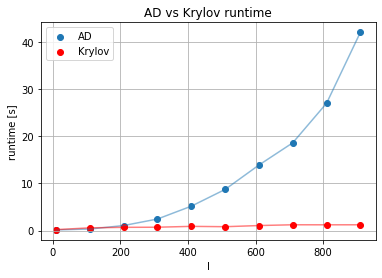

In [34]:
plt.scatter(h_dims, adtimes, color='C0', label="AD")
plt.plot(h_dims, adtimes, color='C0', alpha = 0.5)

plt.scatter(h_dims, ktimes, color='r', label="Krylov")
plt.plot(h_dims, ktimes, color='r', alpha = 0.5)

plt.xlabel("l")
plt.ylabel("runtime [s]")

plt.title("AD vs Krylov runtime")
plt.grid()
plt.legend()

plt.show()

In [6]:
adtimes = [0.12549805641174316, 0.3137378692626953, 1.0548009872436523, 2.440361976623535, 5.16273307800293, 8.718554973602295, 13.897977113723755, 18.615697145462036, 27.014513731002808, 42.077934980392456]
ktimes_old = [0.1898491382598877, 0.5633950233459473, 0.6736938953399658, 0.6977560520172119, 0.8792262077331543, 0.8070337772369385, 1.0527050495147705, 1.2177798748016357, 1.209434986114502, 1.2146077156066895]
ktimes_new = [0.2308180332183838, 0.5363681316375732, 0.6581361293792725, 0.6247711181640625, 0.6761720180511475, 0.7147650718688965, 0.7632489204406738, 0.8393259048461914, 0.8628678321838379, 0.9217147827148438]
ktimes_scipy = [0.13176989555358887, 0.13581418991088867, 0.12553811073303223, 0.1103360652923584, 0.11827301979064941, 0.1321089267730713, 0.12587904930114746, 0.16336393356323242, 0.16615009307861328, 0.12619781494140625]

[0.13176989555358887, 0.13581418991088867, 0.12553811073303223, 0.1103360652923584, 0.11827301979064941, 0.1321089267730713, 0.12587904930114746, 0.16336393356323242, 0.16615009307861328, 0.12619781494140625]


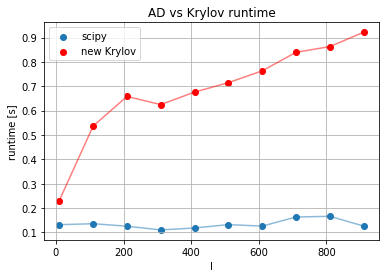

In [7]:
plt.scatter(h_dims, ktimes_scipy, color='C0', label="scipy")
plt.plot(h_dims, ktimes_scipy, color='C0', alpha = 0.5)

plt.scatter(h_dims, ktimes_new, color='r', label="new Krylov")
plt.plot(h_dims, ktimes_new, color='r', alpha = 0.5)

plt.xlabel("l")
plt.ylabel("runtime [s]")

plt.title("AD vs Krylov runtime")
plt.grid()
plt.legend()

plt.show()